# Credit Dataset

Raihana Fawaz (1103210102)

In [62]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Changed Labelencoder to LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [48]:
# Load Dataset
df = pd.read_csv('MaterialStrength.csv')

# Menampilkan 5 Baris Pertama Dataset
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30


In [49]:
# Memberikan informasi pada dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB


Preprocessing Data

In [50]:
# Mengubah target feature menjadi kategori berdasarkan threshold
threshold = df['target_feature'].median()
df['target_feature'] = (df['target_feature'] > threshold).astype(int)

In [53]:
# Konversi objek menjadi numerik dengan Label Encoder
label_encoder = LabelEncoder()
for col in ['x14', 'x15']:
    df[col] = label_encoder.fit_transform(df[col])

In [54]:
# Memisahkan fitur X dan y
X = df.drop('target_feature', axis=1)
y = df['target_feature']

In [55]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Standarisasi fitur untuk SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Melatih Model

In [57]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [58]:
# Prediksi data uji
y_pred = svm_model.predict(X_test)

Classification Model

In [63]:
# Evaluasi Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC: {auc}')
print('Classification Report:')
print(classification_report)

Accuracy: 0.9563106796116505
Precision: 0.9532710280373832
Recall: 0.9622641509433962
F1-Score: 0.9577464788732394
AUC: 0.9561320754716981
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       100
           1       0.95      0.96      0.96       106

    accuracy                           0.96       206
   macro avg       0.96      0.96      0.96       206
weighted avg       0.96      0.96      0.96       206



Visualisasi menggunakan ROC Curve

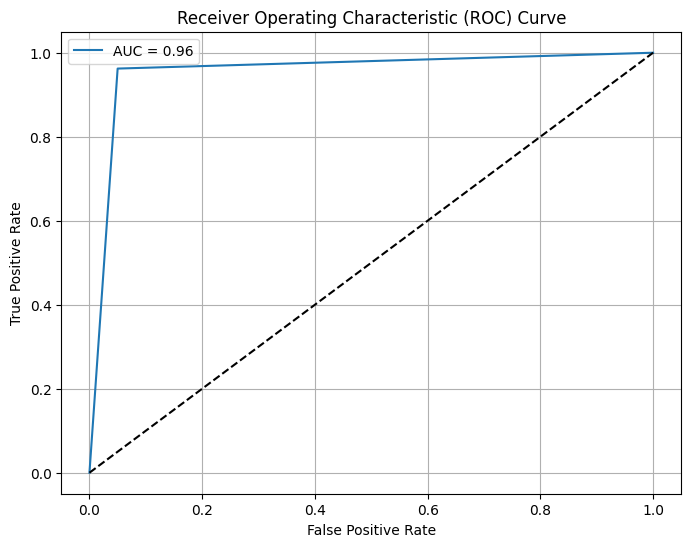

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Hitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Hitung AUC
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


Grafik ROC curve yang ditampilkan menunjukkan performa model klasifikasi dengan AUC (Area Under the Curve) sebesar 0.96. Nilai AUC yang tinggi ini mengindikasikan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan negatif. Hal ini terlihat dari kurva ROC yang mendekati sudut kiri atas grafik, yang menunjukkan True Positive Rate (TPR) yang tinggi dan False Positive Rate (FPR) yang rendah. Dengan AUC sebesar 0.96, model memiliki peluang sebesar 96% untuk secara benar mengklasifikasikan kelas positif lebih tinggi daripada kelas negatif ketika membandingkan dua sampel secara acak. Garis diagonal putus-putus dalam grafik berfungsi sebagai baseline untuk model acak, dan model yang dihasilkan jelas melampaui baseline tersebut. Dengan performa yang unggul ini, model dapat diandalkan dalam aplikasi yang membutuhkan akurasi tinggi, seperti deteksi penyakit atau masalah keamanan, di mana tingkat kesalahan harus diminimalkan.